<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연결 제약 조건

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [0]:
# For reproducibility
np.random.seed(1000)

nb_samples = 3000

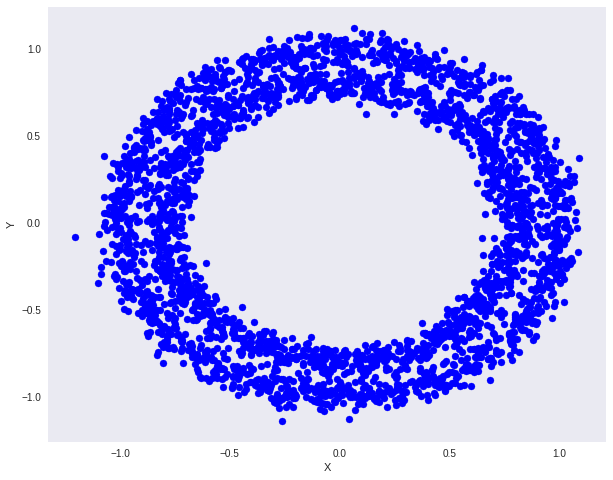

In [12]:
# Create the dataset
X, _ = make_circles(n_samples=nb_samples, noise=0.05)

# Show the dataset
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X[:, 0], X[:, 1], marker='o', color='b')
plt.show()

Unstructured clustering with average linkage


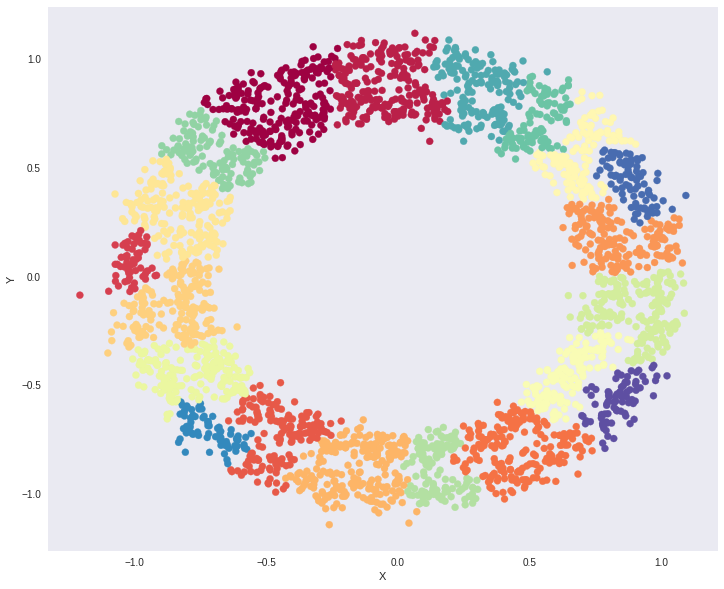

In [17]:
# Unstructured clustering with average linkage
print('Unstructured clustering with average linkage')
ac = AgglomerativeClustering(n_clusters=20, linkage='average')
ac.fit(X)

# Plot the clustered dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X[:, 0], X[:, 1], marker='o', cmap=plt.cm.Spectral, c=ac.labels_)
plt.show()

Imposing connectivity constraints


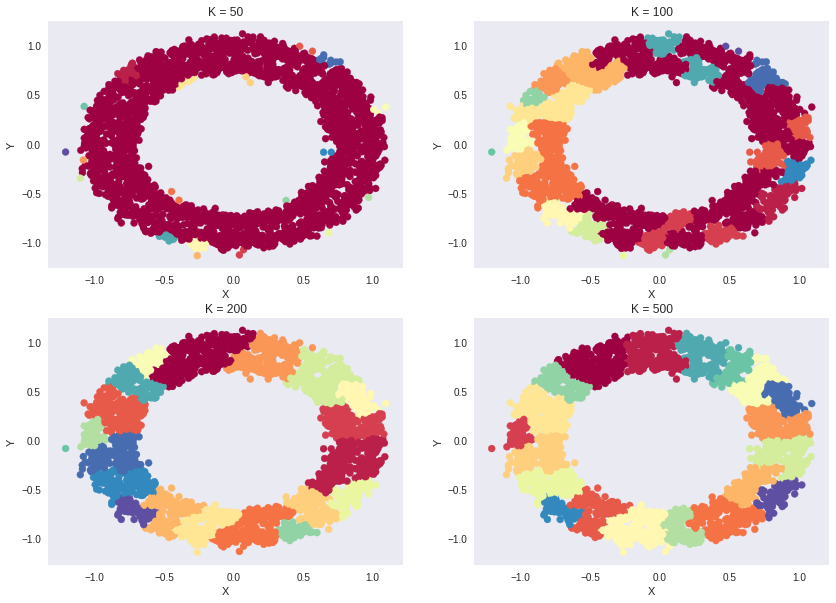

In [19]:
# Connectivity constraints
print('Imposing connectivity constraints')

acc = []
k = [50, 100, 200, 500]

ac = AgglomerativeClustering(n_clusters=20, connectivity=None, linkage='average')
ac.fit(X)

for i in range(4):
    kng = kneighbors_graph(X, k[i])
    ac1 = AgglomerativeClustering(n_clusters=20, connectivity=kng, linkage='average')
    ac1.fit(X)
    acc.append(ac1)

# Show the four plots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ax[0, 0].grid()
ax[0, 0].set_title('K = 50')
ax[0, 0].set_xlabel('X')
ax[0, 0].set_ylabel('Y')
ax[0, 0].scatter(X[:, 0], X[:, 1], marker='o', cmap=plt.cm.Spectral, c=acc[0].labels_)

ax[0, 1].grid()
ax[0, 1].set_title('K = 100')
ax[0, 1].set_xlabel('X')
ax[0, 1].set_ylabel('Y')
ax[0, 1].scatter(X[:, 0], X[:, 1], marker='o', cmap=plt.cm.Spectral, c=acc[1].labels_)

ax[1, 0].grid()
ax[1, 0].set_title('K = 200')
ax[1, 0].set_xlabel('X')
ax[1, 0].set_ylabel('Y')
ax[1, 0].scatter(X[:, 0], X[:, 1], marker='o', cmap=plt.cm.Spectral, c=acc[2].labels_)

ax[1, 1].grid()
ax[1, 1].set_title('K = 500')
ax[1, 1].set_xlabel('X')
ax[1, 1].set_ylabel('Y')
ax[1, 1].scatter(X[:, 0], X[:, 1], marker='o', cmap=plt.cm.Spectral, c=acc[3].labels_)
plt.show()